

# Project: Investigating the NoShowAppointment Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information collected from over 100k medical specialists in Brazil indicating patients who showed up for their appointment and those who didn't. This analysis is focused on gaining insights on factors that possibly influence a patient showing or not showing up for appointments

> The dataset with its description can be found on the site  https://www.kaggle.com/joniarroba/noshowappointments/home




In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


##### <a id='question'></a>
## Questions

- **What is the percentage of patients that missed their appointment?**
- **How does attendance or missing of appointments vary by gender?**
- **Do patients enrolled in Brazilian welfare program tends to show up for the appointments?**
- **Which days of the week were appointments mostly scheduled?**
- **What is the age distribution of patients scheduled for the appointment?**
- **Which age range  of patients showed up for the appointment the most?**
- **How does the days between the scheduled and appointment day affects show up rate?**

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# loading the data
da = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

# getting the first five observations of the data
da.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# getting the number of observations and variables
da.shape

(110527, 14)

In [4]:
#getting information on each variable
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
da.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#columns in the data
da.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
#creating a function to get summary of columns 
def function(x):
    print("The unique values in the column are: {} ".format(x.unique()))
    print("The number of unique values in the column is: {} ".format(x.nunique()))
    print("The count of each unique values in the column is: \n {} ".format(x.value_counts()))
    pl = sns.countplot(x=x)
    pl.set_title("Count plot of unique values")


The unique values in the column are: [0 1] 
The number of unique values in the column is: 2 
The count of each unique values in the column is: 
 0    75045
1    35482
Name: SMS_received, dtype: int64 


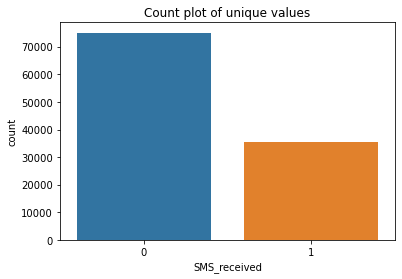

In [8]:
#applying function to SMS_received column
function(da['SMS_received'])

> The "SMS_received" variable only contains two unique values which is different from the dataset description.More information is needed for further analysis

The unique values in the column are: [0 1 2 3 4] 
The number of unique values in the column is: 5 
The count of each unique values in the column is: 
 0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64 


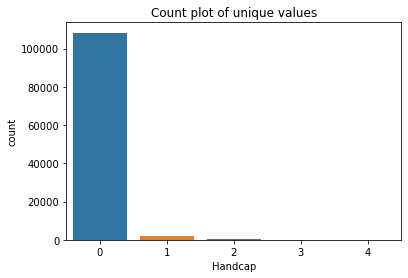

In [9]:
#applying function to Handcap column
function(da['Handcap'])

> The "Handcap" variable contains 5 unique values which is the different from the column description which state it is a categorical variable. My assumption is the "Handcap" and "SMS_received" column were swapped but more information is needed for verification before further analysis 

The unique values in the column are: [1 0] 
The number of unique values in the column is: 2 
The count of each unique values in the column is: 
 0    88726
1    21801
Name: Hipertension, dtype: int64 


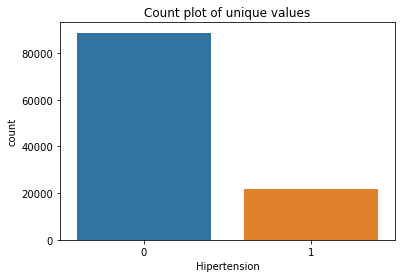

In [10]:
#applying function to Hipertension column
function(da['Hipertension'])

> 88726 patients out of the 110527 scheduled for appointment do not have hypertension which implies that there are more patients without hypertension that those having hypertension

The unique values in the column are: [0 1] 
The number of unique values in the column is: 2 
The count of each unique values in the column is: 
 0    102584
1      7943
Name: Diabetes, dtype: int64 


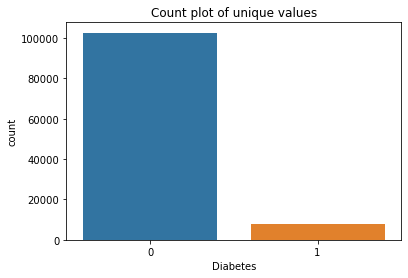

In [11]:
#applying function to Diabetes column
function(da['Diabetes'])

> Most of the patients scheduled for appointments were not diabetes patients. Only 7943 out of 110527 patients have diabetes

The unique values in the column are: [0 1] 
The number of unique values in the column is: 2 
The count of each unique values in the column is: 
 0    107167
1      3360
Name: Alcoholism, dtype: int64 


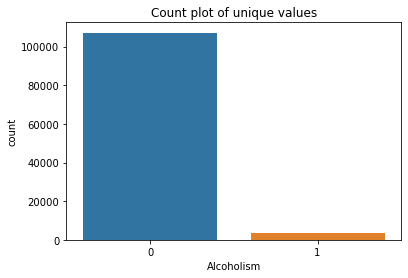

In [12]:
#applying function to Alcoholism column
function(da['Alcoholism'])

> Only 3360 patients out of the 110257 patients are alcoholic implying that most of the patients are not alcoholic

>  **Initial Observations**

>1. The dataset contains 110527 rows and 14 columns(13 dependent variable and one independent)
>2. There are no missing values in the data 
>3. The datetime variables "ScheduledDay" and "AppointmentDay" are taken as strings and should be converted to datetime
>4. Categorical Variables like "Scholarship","Hipertension","Diabetes","Alcoholism" are taken as Integers so they need to be       changed for easy analysis
>5. "Handcap" is a categorical variable but contains more than two unique values(more information needed)
>6. "SMS_received" represents number of SMS received but the variable only contains 0 and 1(more information needed)
>7. The column "No-show" has to be renamed to "no_show" to avoid errors during analysis



## Data Cleaning 

###  1. Changing the variables stated above to Datetime

In [13]:
# changing 'ScheduledDay' and 'AppointmentDay' to datetime
da['ScheduledDay'] = pd.to_datetime(da['ScheduledDay'])
da['AppointmentDay'] = pd.to_datetime(da['AppointmentDay'])


In [14]:
#confirming the changes
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### 2. Renaming the column "No-show" to "no_show"

In [15]:
#renaming the column
da.rename(columns = {"No-show":"no_show"},inplace=True)

In [16]:
#confirming the change
da.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'no_show'],
      dtype='object')

### 3. changing the integer variables stated above to categorical variables

In [17]:
#changing 0 and 1 in the categorical variables to "no" and "yes"
da['Scholarship'] = da['Scholarship'].map({1:"yes",0:"no"})
da['Hipertension'] = da['Hipertension'].map({1:"yes",0:"no"})
da['Diabetes'] = da['Diabetes'].map({1:"yes",0:"no"})
da['Alcoholism'] = da['Alcoholism'].map({1:"yes",0:"no"})


In [18]:
#confirming changes made
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  object             
 8   Hipertension    110527 non-null  object             
 9   Diabetes        110527 non-null  object             
 10  Alcoholism      110527 non-null  object             
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  no_show       

In [19]:
#confirming changes made
da.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,no,yes,no,no,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,no,no,no,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,no,no,no,no,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,no,no,no,no,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,yes,yes,no,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1; What is the percentage of patients that missed the scheduled appointment?

> Note: "Yes" if the patient did not show up and "No" if the patient showed up

In [20]:
#count of unique values in the no_show column
da['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

> 88208 patients showed up for the appointment and 22319 didn't show up for the appointment

20% of patients missed their scheduled appointments


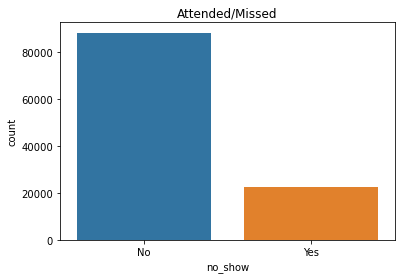

In [21]:
appointments = da.shape[0]        #all appointments
missed_appointments = da.query('no_show == "Yes"')['no_show'].count()    #getting the count of appointments missed
missed_app_percent = int(round(missed_appointments / appointments * 100)) #percentage of appointments missed

pl = sns.countplot(x=da['no_show'],data=da)               #countplot of dependent variable
pl.set_title("Attended/Missed")              #title of plot

print("{}% of patients missed their scheduled appointments".format(missed_app_percent))

> 20% of the patients did not show up for the appointment

### Research Question 2: How does attendance or missing of appointments vary by gender?

In [22]:
#getting the number of female patients scheduled for appointment
len(da.query('Gender == "F"'))

71840

> 71840 out of the total patients scheduled for appointment are females

In [23]:
#getting the number of male patients scheduled for appointment
len(da.query('Gender == "M"'))

38687

> 38687 out of the total patients scheduled for appointment are males

> **Insights** : There are more females scheduled for the appointment than Males

In [24]:
#counting based on no_show and gender groups
da.groupby(['no_show','Gender'])['Gender'].count()

no_show  Gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

> Out of the 71840 female patients that were scheduled for appointment,57246 showed up and 14594 didn't show up(approximately 80% of females showed up and 20% didn't)

> Out of the 38687 male patients that were scheduled for appointment,30962 showed up and 7725 didn't show up(approximately 80% of males showed up and 20% didn't)

14594 out of the total 71840 female appointments were missed representing 20% of the female appointments
7725 out of the total 38687 male appointments were missed representing 20% of the total male appointments


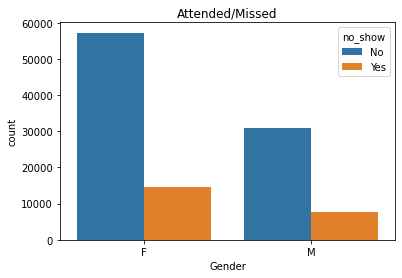

In [25]:
female_appointment = da.query('Gender == "F"')['Gender'].count()    #count of female appointments
male_appointment = da.query('Gender == "M"')['Gender'].count()      #count of male appointments

missed_female_appointment = len(da.query('no_show == "Yes" and Gender == "F"'))   #count of missed female appointments
missed_male_appointment = len(da.query('no_show == "Yes" and Gender == "M"'))     #count of missed male appointments
                                       
missed_female_percent = int(round(missed_female_appointment/female_appointment * 100)) #percentage of missed female appointments
missed_male_percent = int(round(missed_male_appointment/male_appointment * 100))      #percentage of missed male appointments

pl = sns.countplot(x=da.Gender,hue=da.no_show,data=da)
pl.set_title("Attended/Missed")

print("{} out of the total {} female appointments were missed representing {}% of the female appointments"
      .format(missed_female_appointment,female_appointment,missed_female_percent))

print("{} out of the total {} male appointments were missed representing {}% of the total male appointments"
      .format(missed_male_appointment,male_appointment,missed_male_percent))

> There isn't much significant difference between the percentage of females who showed up for the appointments and that of males so Gender doesn't seem to have much correlation with showing up for the appointment. 
>However,the number of females who were scheduled for the appointment were more than males. My assumption is that females tends to care more about medical checkup than males(More data needed to support this)

### Research Question 3: Do patients enrolled in Brazilian welfare program tends to show up for the appointments?

In [26]:
#getting count of unique values in Scholarship column
da['Scholarship'].value_counts()

no     99666
yes    10861
Name: Scholarship, dtype: int64

> The number of patients scheduled not on Brazilian welfare program(99666) is less than those on welfare program(10861) indiating that large percentage of the patients are not on welfare program

In [27]:
#counting based on no_show and Scholarship groups
da.groupby(['no_show','Scholarship'])['Scholarship'].count()

no_show  Scholarship
No       no             79925
         yes             8283
Yes      no             19741
         yes             2578
Name: Scholarship, dtype: int64

> Out of the 99666 patients not on welfare program,79925 showed up and 19741 didn't show up for the appointment(approximately 80% showed up and 20% didnt show up)

> Out of the 10861 patients on welfare program,8283 showed up and 2578 didn't show up for the appointment(approximately 76% showed up and 24% didnt show up)

2578 out of the total 10861 patients on welfare program missed the appointment representing 24% of the total welfare recipients
19741 out of the total 99666 patients not on welfare program missed the appointment representing 20% of the total welfare recipients


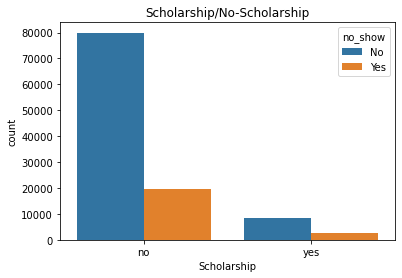

In [28]:
scholarship_recipient = da.query('Scholarship == "yes"')['Scholarship'].count()  #total patients on welfare benefits
no_scholarship_recipient = da.query('Scholarship == "no"')['Scholarship'].count() #total patients not on welfare benefits
 
#total patients on welfare benefits who missed appointments
missed_scholarship_recipient = len(da.query('no_show == "Yes" and Scholarship == "yes"'))

#total patients not on welfare benefits who missed appointments
no_missed_scholarship_recipient = len(da.query('no_show == "Yes" and Scholarship == "no"'))

#percentage of patients on and not on welfare benefits who missed appointments
missed_scholarship_percent = int(round(missed_scholarship_recipient/scholarship_recipient * 100))
no_missed_scholarship_percent = int(round(no_missed_scholarship_recipient/no_scholarship_recipient * 100))

pl = sns.countplot(x=da.Scholarship,hue=da.no_show,data=da)
pl.set_title("Scholarship/No-Scholarship")

print("{} out of the total {} patients on welfare program missed the appointment representing {}% of the total welfare recipients"
      .format(missed_scholarship_recipient,scholarship_recipient,missed_scholarship_percent))

print("{} out of the total {} patients not on welfare program missed the appointment representing {}% of the total welfare recipients"
      .format(no_missed_scholarship_recipient,no_scholarship_recipient,no_missed_scholarship_percent))

> **Insights** : 
- It seems preference were given to patients not on welfare program in the schedule of appointments given the significant difference in the number of patients on welfare and those not in the appointments
- Those not on welfare program tends to be scheduled for appointments and even show up more than to those on welfare program

### Research Question 4: Which days of the week were appointments mostly scheduled?

In [29]:
da['appointment_day_of_week'] = da['AppointmentDay'].dt.dayofweek      #converting the date to the day of the week

#changing each day of the week to corresponding days in words
da['appointment_day_of_week'] = da['appointment_day_of_week'].map({0:"Monday",1:"Tuesday",2:"Wednesday",
                                                                  3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})

> Converting the "AppointmentDay" datetime column to day of week for easy analyis

In [30]:
#count of each unique day
da['appointment_day_of_week'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: appointment_day_of_week, dtype: int64

> There is no appointment on Sunday and only few appointment(39) on Saturday

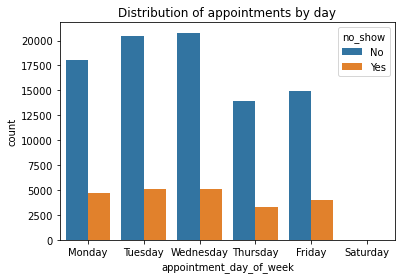

In [31]:
#countplot of appointment_day_of week
pl = sns.countplot(x=da['appointment_day_of_week'], hue=da.no_show,data=da,
                  order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
pl.set_title("Distribution of appointments by day");


> This shows the distribution of attended and missed appointments by day.
The appointments were majorly scheduled during the weekdays with few(39) occuring on Saturdays and none occuring on Sundays.Wednesdays and  Tuesdays are the days with the highest turn up for the appointments

### Research Question 5: What is the age distribution of patients scheduled for the appointment?

In [32]:
#Average age of patients scheduled for appointment
da['Age'].mean()

37.08887421173107

> The average age of patients scheduled for appointment is 37

In [33]:
#getting statistical summary and unique values of Age column
print("The minimum age of patients is {} :".format(da['Age'].min()))
print("The maximum age of patients is {} :".format(da['Age'].max()))
print("The unique ages of patients is {} :".format(da['Age'].unique()))

The minimum age of patients is -1 :
The maximum age of patients is 115 :
The unique ages of patients is [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1] :


> The oldest of the patients scheduled for appointment is 115years and the minimum is -1. However since a person's age cannot be -1,I will be checking for the number of time the age is -1 to  make decision on what to do about it

In [34]:
#checking the number of time age of -1 occurs
len(da.query('Age == "-1"'))

1

> The error seems to occur once so rather than dropping the row, it can be imputed with age 1 as there is a possibility the age of the patient could be 1

In [35]:
#changing age of -1 to 0
da['Age'].replace(to_replace={-1:0},inplace=True)

In [36]:
#checking unique value counts for confirmation
da['Age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [37]:
#getting statistical summary of Age column
da['Age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> The average and median age is 37. Maximum age is 115 and the minimum is 0

<AxesSubplot:>

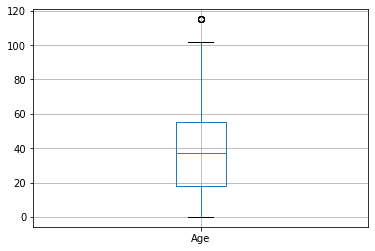

In [38]:
#box plot to get summary of age column
da.boxplot(column="Age")

> The Age column contains outliers,this is due to the patients that are of age 115. However,age 0f 115 is not improbable so the ouliers will be taken into consideration

In [39]:
#how many patients of ae 115 showed up or didn't show up for the appointment?
da.query('Age == "115"')['no_show'].value_counts()

Yes    3
No     2
Name: no_show, dtype: int64

> Out of the five patient of Age 115years who were scheduled for appointment, 2 showed up

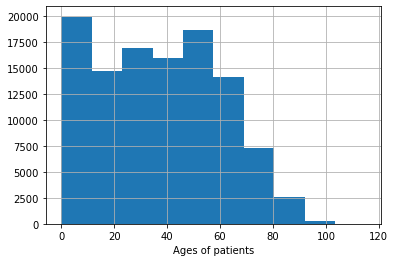

In [40]:
#distribution of ages of patients
da['Age'].hist().set_xlabel("Ages of patients");

> THe age distribution of patients showed that most of the patients are within the age range of 0-60 with a lot of infants being scheduled for the appointments

### Research Question 6:  Which age range of patients who showed up for the appointment the most?

> Since the age_range column doesn't exist,there is a need to categorize the ages of patients using ages

In [41]:
#dividing into ranges
da['age_range'] = pd.cut(x=da['Age'],bins=[0,20,40,60,80,100,120])

> Dividing the data into ranges 0-20,20-40,40-60,60-80,80-100,100-120

In [42]:
#checking the ranges for confirmation
da['age_range'].sample(5)

100957    (20, 40]
105659    (40, 60]
56543     (40, 60]
18424     (60, 80]
5974      (40, 60]
Name: age_range, dtype: category
Categories (6, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100] < (100, 120]]

Text(0.5, 1.0, 'Count of Age ranges of patients')

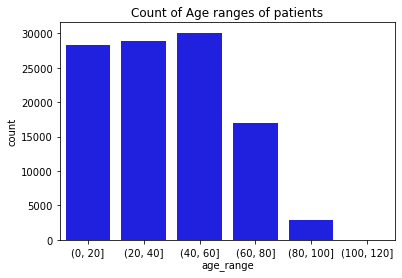

In [43]:
#countplot of age_range column
pl = sns.countplot(x=da['age_range'],data=da,color="blue")
pl.set_title("Count of Age ranges of patients")

> 40-60 is the age range with the highest number of patients with the range 100-120 consisting of only few patients
How about the age range of patients who showed up the most for the appointment?

Text(0.5, 1.0, 'Count of Age ranges of patients')

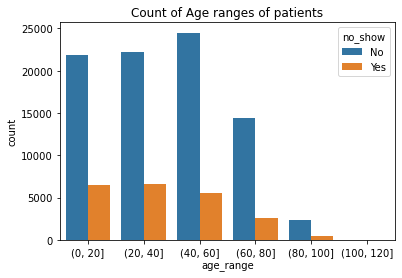

In [44]:
pl = sns.countplot(x='age_range',hue='no_show',data=da);
pl.set_title("Count of Age ranges of patients")

> The age range scheduled for appointment the most is (40-60)years. 
The number of patients scheduled increased between 0-60 years.
The number of patients scheduled for appointment decreased from ages above 60

In [45]:
#getting value_counts by grouping by age_range and no_show 
new_c = da.groupby('age_range')['no_show'].value_counts(normalize=True)

#creating a percent_age variable
new_c = new_c.mul(100).rename('Percent_age').reset_index()

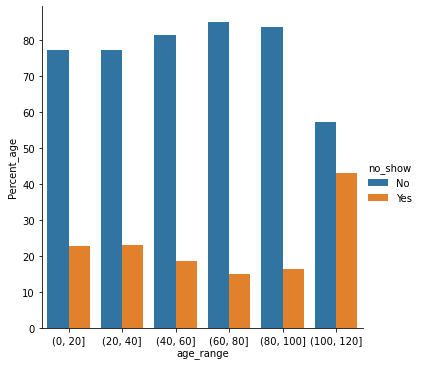

In [46]:
#catplot to show percentage of age_ranges
hl = sns.catplot(x='age_range', y='Percent_age', hue='no_show', kind='bar', data=new_c)

> The 60-80 years age range has the highest show up percentage and the least no-show up percentage. For ages between 40-100 years,the show up rate is above 80%

### Research Question 7: **How does the days between the scheduled and appointment day affects show up rate?**

> Since there is no days between scheduled and appointed day,a column will be created for it

In [47]:
#creating the awaiting days column
da['awaiting_days'] = (da.AppointmentDay - da. ScheduledDay).dt.days

> The awaiting day is created by getting the interval between the appointment day and scheduled day

In [48]:
#confirming the awaiting_days column exist
da.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,appointment_day_of_week,age_range,awaiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,no,yes,no,no,0,0,No,Friday,"(60, 80]",-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,no,no,no,0,0,No,Friday,"(40, 60]",-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,no,no,no,no,0,0,No,Friday,"(60, 80]",-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,no,no,no,no,0,0,No,Friday,"(0, 20]",-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,yes,yes,no,0,0,No,Friday,"(40, 60]",-1


> Number of days cannot be negative however some values in the awaiting_days column are negative so more exploration is needed to be done on the column

In [49]:
#checking the unique values in the column
da['awaiting_days'].unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122], dtype=int64)

> The unexpected values in the column are -1,-2 and -7. How about checking the number of times they occur?

In [50]:
#getting number of time awaiting_days of -1,-2 and -7 occurs
print("The number of time awaiting days of -1 occurs is {}:".format(len(da.query('awaiting_days == -1'))))
print("The number of time awaiting days of -2 occurs is {}:".format(len(da.query('awaiting_days == -2'))))
print("The number of time awaiting days of -2 occurs is {}:".format(len(da.query('awaiting_days == -7'))))
print("The number of times awaiting days less than zero occurs is:".format(len(da.query('awaiting_days < 0'))))

The number of time awaiting days of -1 occurs is 38563:
The number of time awaiting days of -2 occurs is 4:
The number of time awaiting days of -2 occurs is 1:
The number of times awaiting days less than zero occurs is:


> Most of the awaiting days less than zero contains a value of -1(38563). There is a need to investigate the appointment date and scheduled days with awaiting days of -1

In [51]:
#checking the appointment day and schedule with awaiting_days of -1
da.query('awaiting_days == -1')[['AppointmentDay','ScheduledDay']].head(30)

,AppointmentDay,ScheduledDay
0,2016-04-29 00:00:00+00:00,2016-04-29 18:38:08+00:00
1,2016-04-29 00:00:00+00:00,2016-04-29 16:08:27+00:00
2,2016-04-29 00:00:00+00:00,2016-04-29 16:19:04+00:00
3,2016-04-29 00:00:00+00:00,2016-04-29 17:29:31+00:00
4,2016-04-29 00:00:00+00:00,2016-04-29 16:07:23+00:00
8,2016-04-29 00:00:00+00:00,2016-04-29 08:02:16+00:00
19,2016-04-29 00:00:00+00:00,2016-04-29 10:43:14+00:00
24,2016-04-29 00:00:00+00:00,2016-04-29 14:19:19+00:00
26,2016-04-29 00:00:00+00:00,2016-04-29 14:19:42+00:00
28,2016-04-29 00:00:00+00:00,2016-04-29 15:48:02+00:00


> Most of the awaiting_days of -1 have appointment day and Scheduled day on the same day so the awaiting_days of -1 can be changed to 0. The error probably occurred due to the time

In [52]:
#replacing awaiting_days of -1 with 0
da['awaiting_days'].replace(to_replace={-1:0},inplace=True)

In [53]:
#confirming the change 
len(da.query('awaiting_days == -1'))

0

 > Now,there is a need to check the columns with awaiting_days of -2 and -7

In [54]:
##checking the appointment day and schedule with awaiting_days of -2
da.query('awaiting_days == -2')[['AppointmentDay','ScheduledDay']]

,AppointmentDay,ScheduledDay
27033,2016-05-09 00:00:00+00:00,2016-05-10 10:51:53+00:00
55226,2016-05-17 00:00:00+00:00,2016-05-18 14:50:41+00:00
64175,2016-05-04 00:00:00+00:00,2016-05-05 13:43:58+00:00
72362,2016-05-03 00:00:00+00:00,2016-05-04 06:50:57+00:00


In [55]:
#checking the appointment day and schedule with awaiting_days of -7
da.query('awaiting_days == -7')[['AppointmentDay','ScheduledDay']]

,AppointmentDay,ScheduledDay
71533,2016-05-05 00:00:00+00:00,2016-05-11 13:49:20+00:00


> In both cases,the ScheduledDay is later than the Appointment day which is not meant to be. Hence the rows with awaiting days of -2 and -7 will be excluded from our analysis

In [56]:
#excluding the values
da = da[(da.awaiting_days >= 0)]

In [57]:
#confirming changes
da['awaiting_days'].unique()

array([  0,   1,   2,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

Text(0.5, 1.0, 'Number of patients by awaiting days')

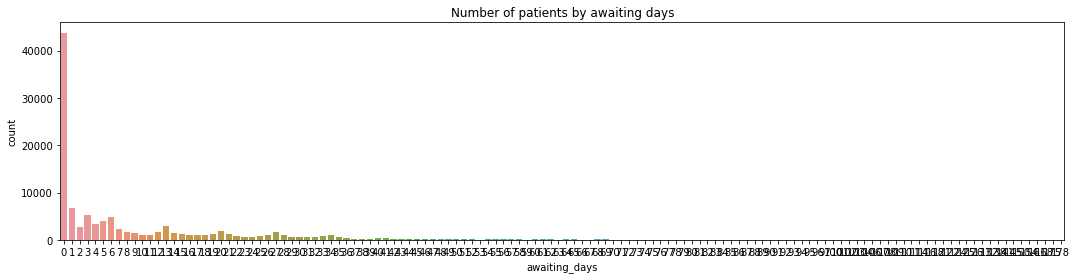

In [58]:
plt.figure(figsize=(18,4))
pl = sns.countplot(x=da['awaiting_days'], data=da);
pl.set_title("Number of patients by awaiting days")

> Patients with awaiting days of 0(appointment day on the scheduled day) showed up the most for the appointment

<AxesSubplot:>

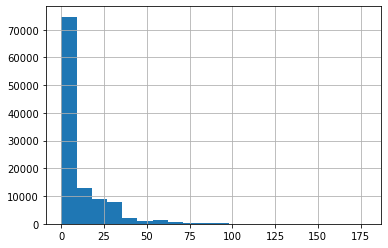

In [59]:
da['awaiting_days'].hist(bins=20)

> The distribution of awaiting days shows that the longer the awaiting days,the lower the show up rate. Hence patients with awaiting days are more likely to show than other with longer awaiting days

<a id='conclusions'></a>
## Conclusions

> I explored the dataset and handled some issues relating to data type and added a new feature. Upon investigation of few of the Independent variables and the dependent variable,I gained some insights. More investigations and statistical analysis will reveal further insights.

>Here are findings to my research questions below;

- 20% of patients failed to show up for their appoitments
- Most of the patients scheduled for appointments are not Hypertension and Diabetes patients
- Most of the patients are not alcoholic(Only 3360 patients out of the 110257 patients are alcoholic)   

- Most of the patients are not on Brazilian welfare program(99666 patients not on welfare program and 10861 on welfare program)
- 2578 out of the total 10861 patients on welfare program missed the appointment representing 24% of the total welfare recipients
- 19741 out of the total 99666 patients not on welfare program missed the appointment representing 20% of the total welfare recipients
- Those not on welfare program tends to be scheduled for appointments and even show up slightly more than those on welfare program

- There are more females scheduled for the appointment than Males(71840 females and 38687 males)
- 14594 out of the total 71840 female appointments were missed representing 20% of the female appointments
- 7725 out of the total 38687 male appointments were missed representing 20% of the total male appointments
- There is no insight to show that females tends to show up more than male or vice versa

- The appointments were majorly during the weekdays with only few scheduled to hold on Saturday. There are no appointment on Sunday

- The average and median age is 37. Maximum age is 115 and the minimum is 0
- Most of the patients are within the age range of 0-60 with a lot of infants scheduled for the appointments.The number of patients scheduled for appointment decreased from ages above 60
- The 60-80 years age range has the highest show up percentage and the least no-show up percentage. For ages between 40-100 years,the show up rate is above 80%

- Patients with awaiting days of 0(appointment day on the scheduled day) showed up the most for the appointment
- The longer the awaitind days,the lower the show up rate. Hence awaiting days is an important in determining whether a patient will show up for the appointment

<a id='limitations'></a>
## Limitations

- More Information is needed to verify whether the Handcap column and the SMS_received were swapped to further investigate how the reminder from the medical personnels affect the patients show up rate
